# Prova 02

Isabella Menezes Ramos 3474

1. (5 pontos) Faça uma análise exploratória dos dados, para conhecer melhor sobre os mesmos, seus
tipos, suas características, suas correlações, dentre outras informações que julgar necessárias e
importantes. Gere gráficos e exiba estatísticas dos dados para que possa compreender melhor os
seus padrões. Apresente conhecimentos que foram extraídos.

**Critério de avaliação:** Foram gerados gráficos visualmente amigáveis e estatísticas para todos os
atributos individualmente, e foram apresentadas (em forma de texto) pelo menos 3 associações entre
os atributos, com foco no valor do seguro, se é fumante e na região.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import cluster

In [100]:
df = pd.read_csv('seguro-saude.csv')
df

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Análise exploratória

In [101]:
df.dtypes

idade                      int64
sexo                      object
indice_massa_corporal    float64
n_dependentes              int64
fumante                   object
regiao                    object
valor_seguro             float64
dtype: object

### Idade

Podemos perceber que a maioria das pessoas no dataset tem entre 18 e 51 anos e as idades 18 e 19 anos tem o maior número de pessoas.

In [102]:
df['idade'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: idade, dtype: float64

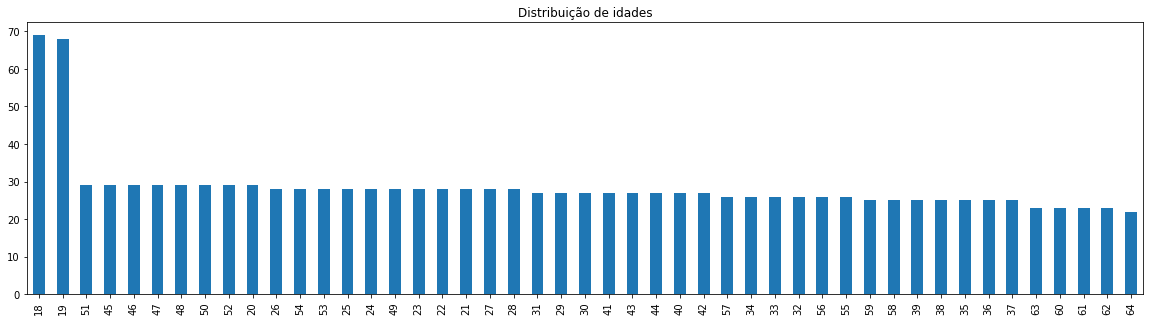

In [103]:
fig = plt.figure(figsize=(20,5))
fig = df['idade'].value_counts().plot.bar()
fig.set_title('Distribuição de idades')
plt.show()

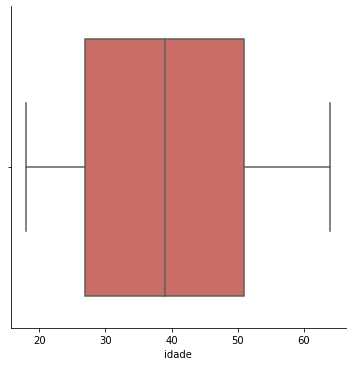

In [104]:
sns.catplot(x="idade", kind="box", palette="hls" ,data=df)

### IMC

A maior parte dos IMCs estão entre 15 e 34, e o IMC 30 é o que mais aparece no dataframe. Observamos também que Apresenta distribuição normal e alguns outliers.

In [105]:
df['indice_massa_corporal'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: indice_massa_corporal, dtype: float64

Distribuição da massa corporal


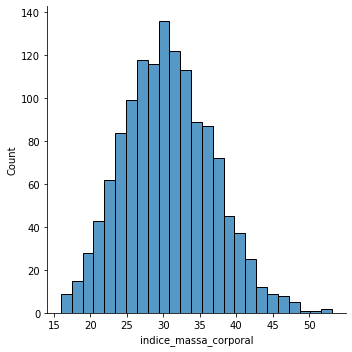

In [106]:
print('Distribuição da massa corporal')
sns.displot(df['indice_massa_corporal'])
plt.show()

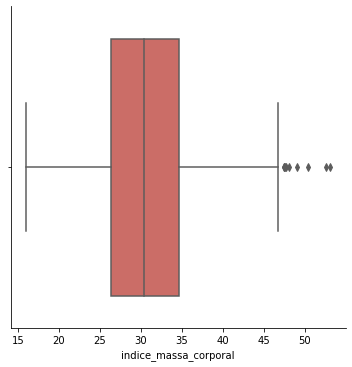

In [107]:
sns.catplot(x="indice_massa_corporal", kind="box", palette="hls" ,data=df)

### Valor seguro

A maioria dos valores do seguroa então entre 1121 e 16639 e boa parte dos valores do seguro das pessoas do dataframe tem o valor menor que 10000. Esta variável apresenta muitos outliers.

In [108]:
df['valor_seguro'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: valor_seguro, dtype: float64

Distribuição do valor do seguro:


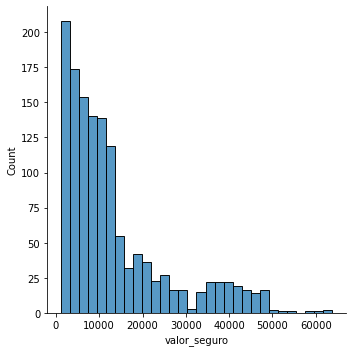

In [109]:
print('Distribuição do valor do seguro:')
sns.displot(df['valor_seguro'])
plt.show()

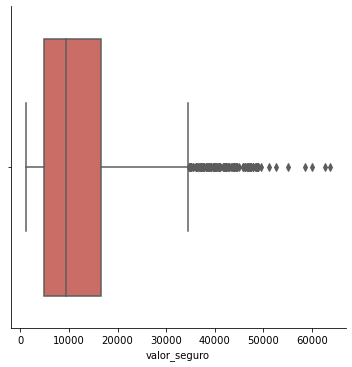

In [110]:
sns.catplot(x="valor_seguro", kind="box", palette="hls" ,data=df)

### Sexo

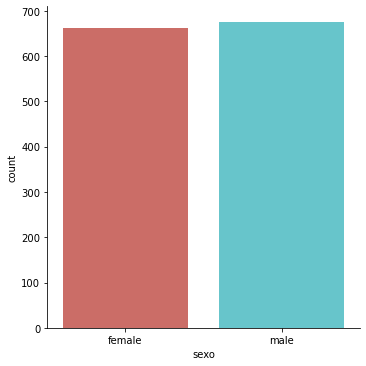

In [111]:
sns.catplot(x="sexo", kind="count", palette="hls", data=df)

### Fumante

Boa parte das pessoas não fumam.

In [112]:
df['fumante'].value_counts()

no     1064
yes     274
Name: fumante, dtype: int64

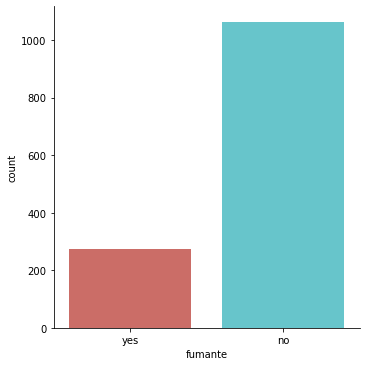

In [113]:
sns.catplot(x="fumante", kind="count", palette="hls", data=df)

### Região

A distribuição das pessoas por região apresenta um número semelhante de pessoas.

In [114]:
df['regiao'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: regiao, dtype: int64

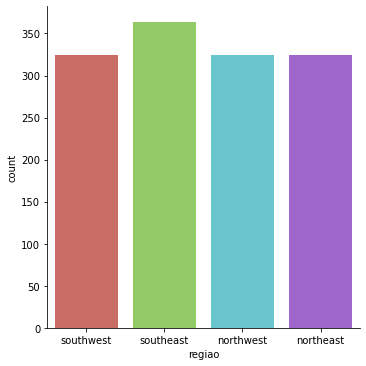

In [115]:
sns.catplot(x="regiao", kind="count", palette="hls", data=df)

### Num dependentes

A maioria das pessoas tem entre 0 e 1 dependentes.

In [116]:
df['n_dependentes'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: n_dependentes, dtype: float64

In [117]:
df['n_dependentes'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: n_dependentes, dtype: int64

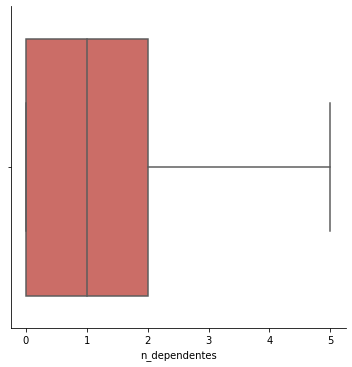

In [118]:
sns.catplot(x="n_dependentes", kind="box", palette="hls" ,data=df)

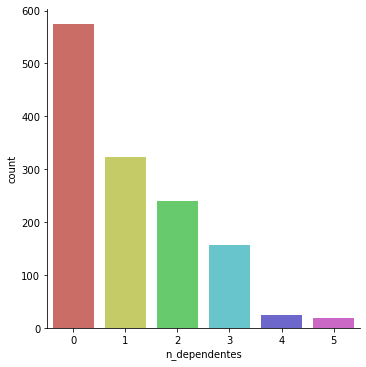

In [119]:
sns.catplot(x="n_dependentes", kind="count", palette="hls", data=df)

### Correlações

Pelo heatmap e pelo pairplot, podemos notar que pode haver uma correlação entre:
* idade x valor_seguro
* indice_massa_corporal x valor_seguro
* indice_massa_corporal x idade

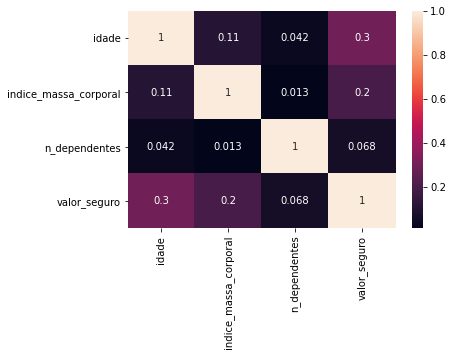

In [120]:
sns.heatmap(df.corr(),annot = True)
plt.show()

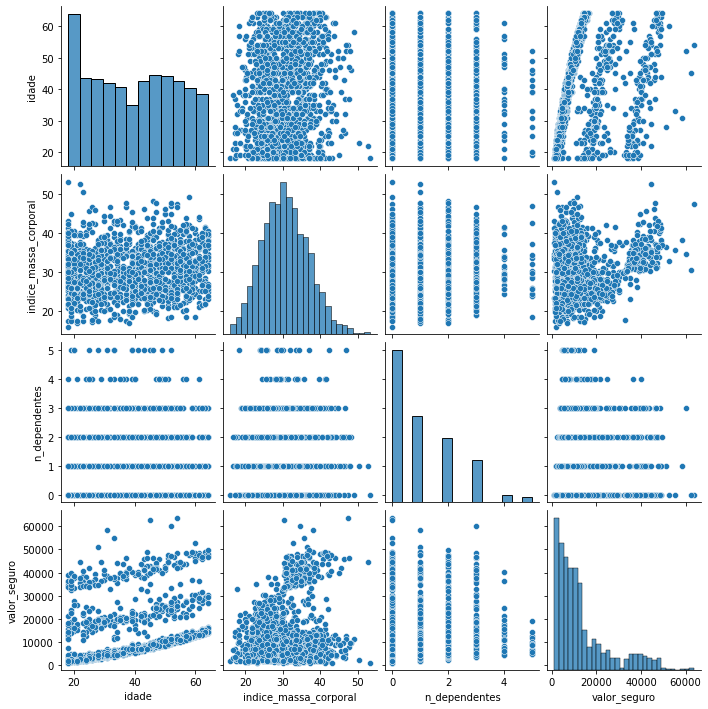

In [121]:
sns.pairplot(df)

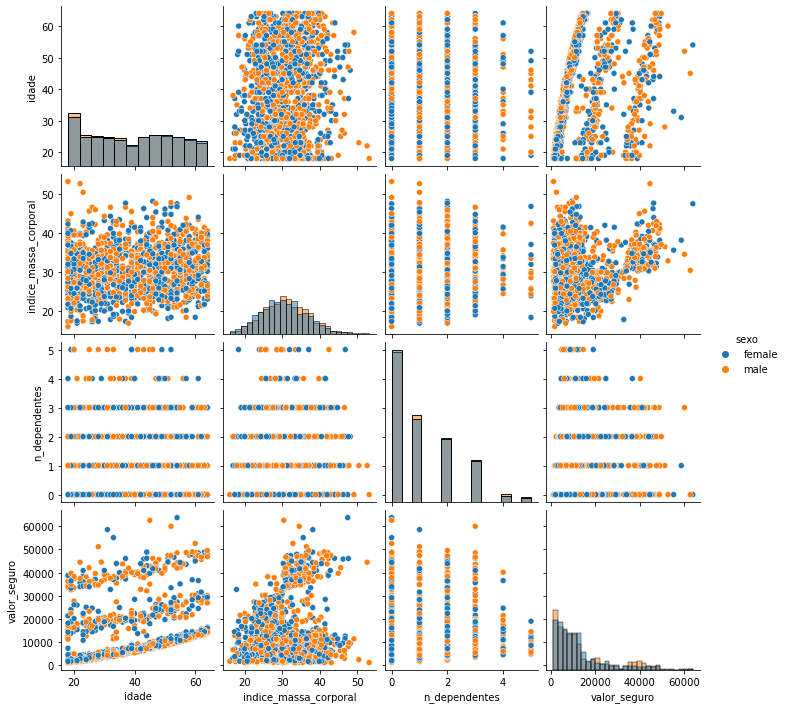

In [122]:
sns.pairplot(df, hue="sexo", diag_kind="hist")

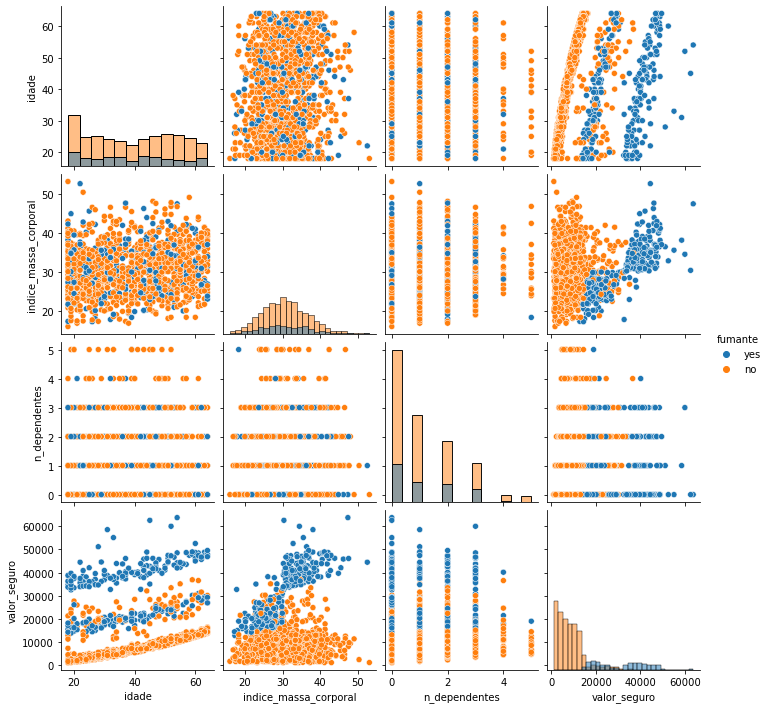

In [123]:
sns.pairplot(df, hue="fumante", diag_kind="hist")

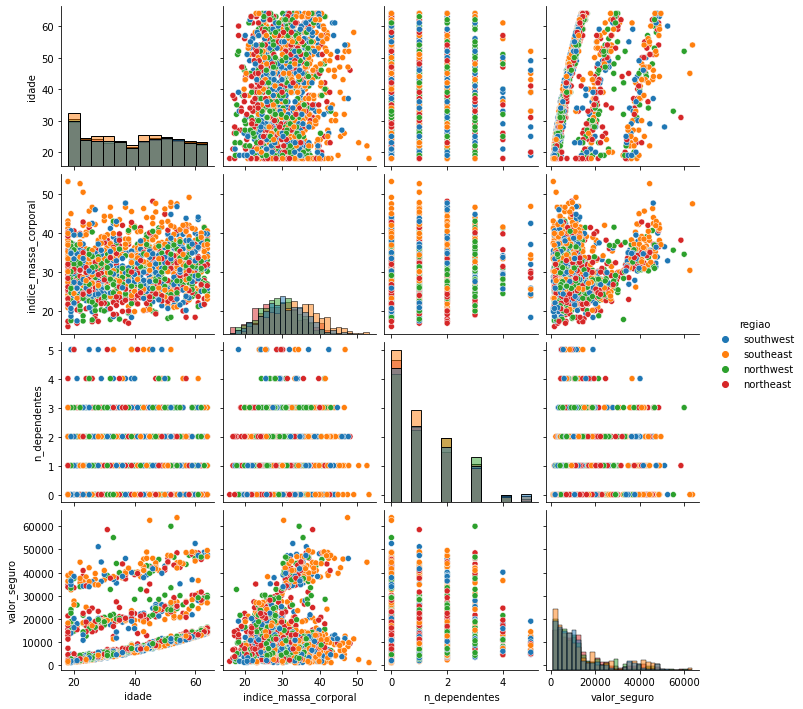

In [124]:
sns.pairplot(df, hue="regiao", diag_kind="hist")

Podemos ver que o valor do seguro é menor para mulheres e é maior para fumantes. A regiao southeast apresenta a maior variação de preço de seguros.

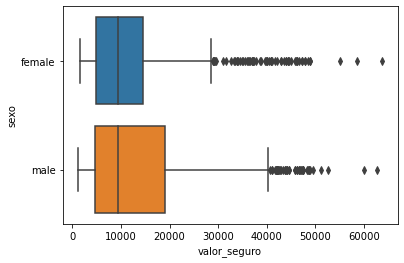

In [125]:
ax = sns.boxplot(x="valor_seguro", y="sexo", data=df)

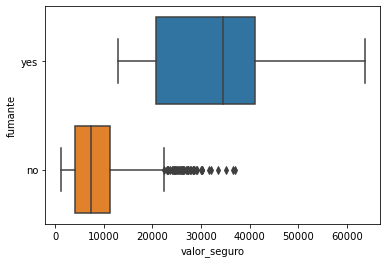

In [126]:
ax = sns.boxplot(x="valor_seguro", y="fumante", data=df)

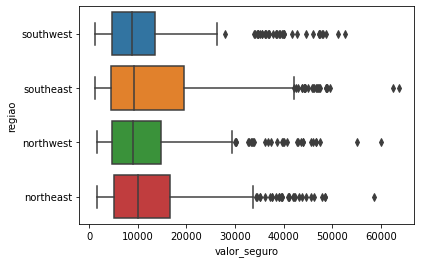

In [127]:
ax = sns.boxplot(x="valor_seguro", y="regiao", data=df)

## Regressão Linear

In [128]:
lab = LabelEncoder()
df['fumante'] = lab.fit_transform(df['fumante'])
df['sexo'] = lab.fit_transform(df['sexo'])
df['regiao'] = lab.fit_transform(df['regiao'])

In [129]:
df

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [130]:
df_corr = df.corr('kendall')
df_corr

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
idade,1.000000,-0.017186,0.073273,0.043253,-0.020821,0.003272,0.475302
sexo,-0.017186,1.000000,0.036630,0.014317,0.076185,0.004213,0.007751
indice_massa_corporal,0.073273,0.036630,1.000000,0.011562,0.001801,0.114214,0.082524
n_dependentes,0.043253,0.014317,0.011562,1.000000,0.015231,0.008693,0.103107
fumante,-0.020821,0.076185,0.001801,0.015231,1.000000,-0.001967,0.541916
regiao,0.003272,0.004213,0.114214,0.008693,-0.001967,1.000000,-0.032112
valor_seguro,0.475302,0.007751,0.082524,0.103107,0.541916,-0.032112,1.000000


A partir do resultado acima, podemos ver que as melhores variáveis para relacionar com valor seguro são: idade e fumante.

In [131]:
from sklearn.linear_model import LinearRegression
X = df[['idade','fumante']]
Y = df['valor_seguro']
lm = LinearRegression()
lm.fit(X,Y)
print('R2 (score): ', lm.score(X.values,Y))

R2 (score):  0.72140082605772


Outra variável que pode ajudar no modelo é o n_dependentes. Tentarei utiliza-la abaixo.

In [132]:
from sklearn.linear_model import LinearRegression
X = df[['idade','fumante','n_dependentes']]
Y = df['valor_seguro']
lm = LinearRegression()
lm.fit(X,Y)
print('R2 (score): ', lm.score(X.values,Y))

R2 (score):  0.7237432233573071


A segunda apresentou um resultado levemente melhor.

In [133]:
print("Intercept %.3f " % lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Intercept -2851.986 


,Coefficient
idade,273.088762
fumante,23842.602064
n_dependentes,486.652369


## Aprendizado Supervisionado

In [134]:
df_corr = df.corr('kendall')
df_corr

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
idade,1.000000,-0.017186,0.073273,0.043253,-0.020821,0.003272,0.475302
sexo,-0.017186,1.000000,0.036630,0.014317,0.076185,0.004213,0.007751
indice_massa_corporal,0.073273,0.036630,1.000000,0.011562,0.001801,0.114214,0.082524
n_dependentes,0.043253,0.014317,0.011562,1.000000,0.015231,0.008693,0.103107
fumante,-0.020821,0.076185,0.001801,0.015231,1.000000,-0.001967,0.541916
regiao,0.003272,0.004213,0.114214,0.008693,-0.001967,1.000000,-0.032112
valor_seguro,0.475302,0.007751,0.082524,0.103107,0.541916,-0.032112,1.000000


Olhando novamente as correlações, vemos que o valor seguro e o sexo apresenta as maiores correlações, tentaremos primeiramente com mais a idade e n_dependentes.

In [136]:
X_train,X_test,Y_train,Y_test = train_test_split(
                df[['valor_seguro','sexo','idade','n_dependentes']],
                df['fumante'],
                test_size=0.2, random_state=0)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print(classification_report(Y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       213
           1       0.85      0.80      0.82        55

    accuracy                           0.93       268
   macro avg       0.90      0.88      0.89       268
weighted avg       0.93      0.93      0.93       268



In [143]:
# SVM
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)
print(classification_report(Y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       213
           1       0.82      1.00      0.90        55

    accuracy                           0.96       268
   macro avg       0.91      0.97      0.94       268
weighted avg       0.96      0.96      0.96       268



In [144]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
print(classification_report(Y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       213
           1       0.77      0.96      0.85        55

    accuracy                           0.93       268
   macro avg       0.88      0.94      0.91       268
weighted avg       0.94      0.93      0.94       268



In [146]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, 
                df[['valor_seguro','sexo','idade','n_dependentes']],
                df['fumante'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.04)


In [147]:
scores = cross_val_score(svm, 
                df[['valor_seguro','sexo','idade','n_dependentes']],
                df['fumante'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.04)


In [149]:
scores = cross_val_score(clf, 
                df[['valor_seguro','sexo','idade','n_dependentes']],
                df['fumante'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.04)


In [152]:
from sklearn.metrics import precision_recall_fscore_support

# KNN
print("KNN (precision, recall, fscore)")
precision_recall_fscore_support(Y_test, knn.predict(X_test), average=None)

KNN (precision, recall, fscore)


(array([0.94907407, 0.84615385]),
 array([0.96244131, 0.8       ]),
 array([0.95571096, 0.82242991]),
 array([213,  55], dtype=int64))

In [ ]:
# SVM
print("SVM (precision, recall, fscore)")
precision_recall_fscore_support(Y_test, svm.predict(X_test), average=None)

In [153]:
# CLF
print("CLF (precision, recall, fscore)")
precision_recall_fscore_support(Y_test, clf.predict(X_test), average=None)

CLF (precision, recall, fscore)


(array([0.98994975, 0.76811594]),
 array([0.92488263, 0.96363636]),
 array([0.95631068, 0.85483871]),
 array([213,  55], dtype=int64))

In [155]:
# yes = 1     no = 0
classes = ['1','0']

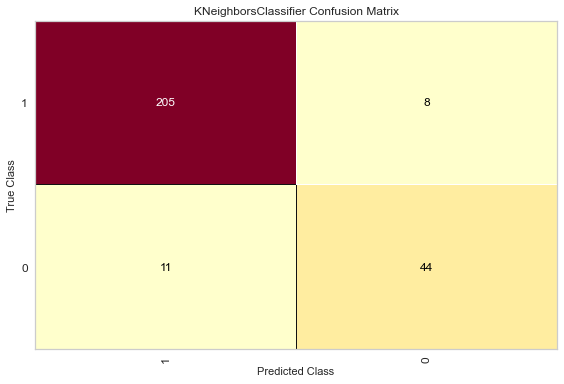

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [156]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn,classes = classes)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.show()

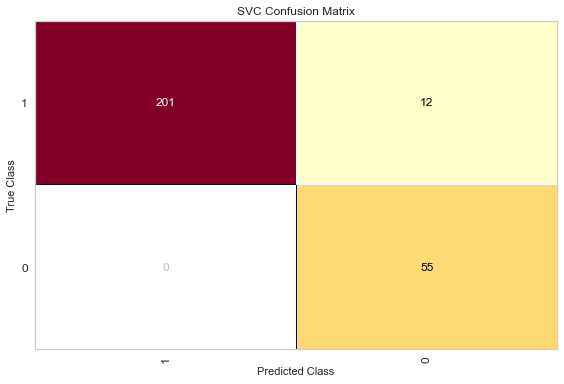

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [157]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm,classes = classes)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.show()

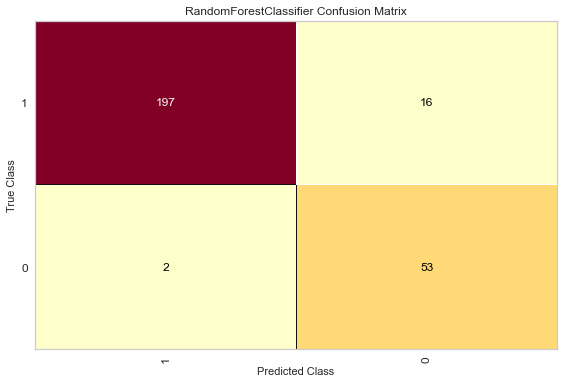

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [158]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(clf,classes = classes)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.show()

## Aprendizado não-supervisionado

In [160]:
df = pd.read_csv('seguro-saude.csv')

In [161]:
variaveis = ['valor_seguro','sexo','idade','n_dependentes']
target = df['fumante']

In [163]:
lab = LabelEncoder()
df['sexo'] = lab.fit_transform(df['sexo'])
df['regiao'] = lab.fit_transform(df['regiao'])

In [171]:
kmeans = cluster.KMeans(n_clusters=2).fit(df[variaveis])

KMeans(n_clusters=2)

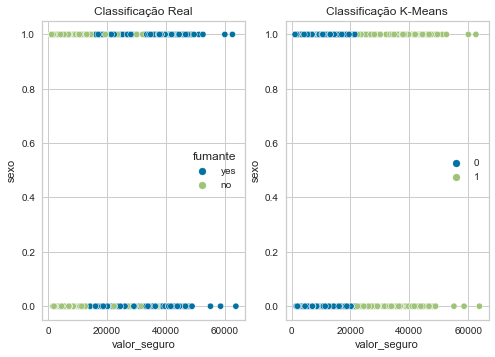

In [165]:
    #Real
    plt.subplot(1,2,1)
    sns.scatterplot(x=df['valor_seguro'], y=df['sexo'], hue=target, s=40)
    plt.title('Classificação Real')

    #K-Means
    plt.subplot(1,2,2)
    sns.scatterplot(x=df['valor_seguro'], y=df['sexo'], hue=kmeans.labels_, s=40)
    plt.title('Classificação K-Means') 
    
    plt.show()

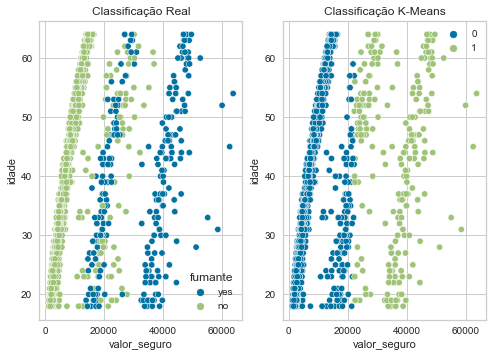

In [167]:
    #Real
    plt.subplot(1,2,1)
    sns.scatterplot(x=df['valor_seguro'], y=df['idade'], hue=target, s=40)
    plt.title('Classificação Real')

    #K-Means
    plt.subplot(1,2,2)
    sns.scatterplot(x=df['valor_seguro'], y=df['idade'], hue=kmeans.labels_, s=40)
    plt.title('Classificação K-Means') 
    
    plt.show()

In [168]:
a= df[['valor_seguro','sexo','idade','n_dependentes','fumante']]
target = df['fumante']

In [172]:
a['label'] = kmeans.labels_

<ipython-input-172-3d660b23e6f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['label'] = kmeans.labels_


In [174]:
a

,valor_seguro,sexo,idade,n_dependentes,fumante,label
0,16884.92400,0,19,0,yes,0
1,1725.55230,1,18,1,no,0
2,4449.46200,1,28,3,no,0
3,21984.47061,1,33,0,no,0
4,3866.85520,1,32,0,no,0
...,...,...,...,...,...,...
1333,10600.54830,1,50,3,no,0
1334,2205.98080,0,18,0,no,0
1335,1629.83350,0,18,0,no,0
1336,2007.94500,0,21,0,no,0


In [175]:
lab = LabelEncoder()
a['fumante'] = lab.fit_transform(a['fumante'])

<ipython-input-175-5415daff3b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['fumante'] = lab.fit_transform(a['fumante'])


In [176]:
print(len(a))
print(len(a[a['fumante'] == a['label']]))
precision = len(a[a['fumante'] == a['label']]) / len(a)
print(precision)

1338
1207
0.9020926756352765


In [177]:
from sklearn import metrics
print('Silhueta:', round(metrics.silhouette_score(a, kmeans.labels_), 4))

Silhueta: 0.7336
